# Yadukrishnan - 21BAI1210

Image negative

Negative image saved as 'negative_image.jpg'.


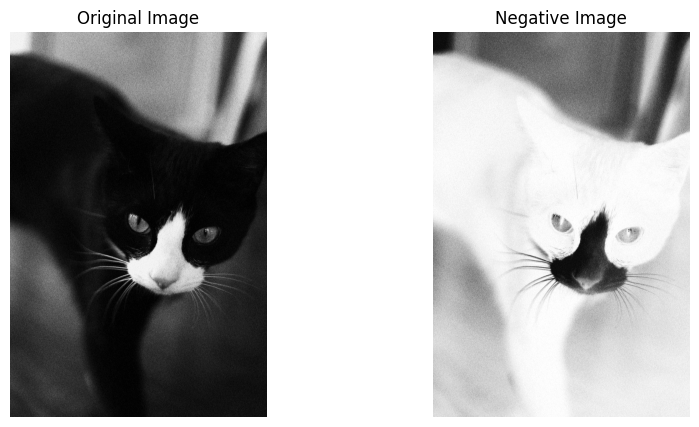

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('./cat.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not open or find the image.")
else:
    negative_image = 255 - image

    cv2.imwrite('negative_image.jpg', negative_image)
    print("Negative image saved as 'negative_image.jpg'.")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Negative Image')
    plt.imshow(negative_image, cmap='gray')
    plt.axis('off')

    plt.show()


Gamma Correction

Gamma-corrected image saved as 'gamma_corrected.jpg'.


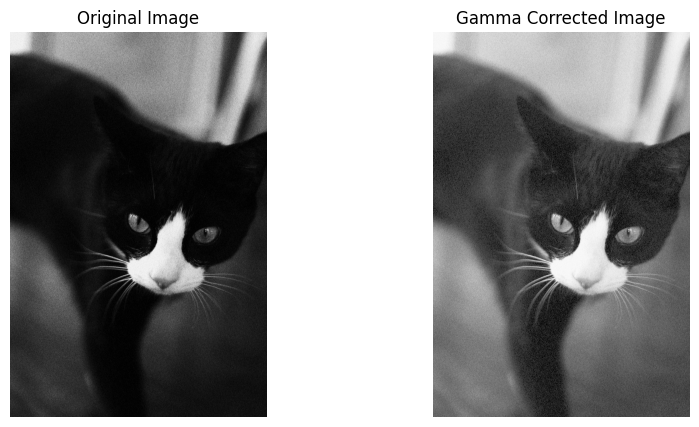

In [4]:
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

image = cv2.imread('./cat.jpg')

if image is None:
    print("Error: Could not open or find the image.")
else:
    gamma_corrected = gamma_correction(image, gamma=2.2)

    cv2.imwrite('gamma_corrected.jpg', gamma_corrected)
    print("Gamma-corrected image saved as 'gamma_corrected.jpg'.")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Gamma Corrected Image')
    plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()


Log Transform

Log-transformed image saved as 'log_transformed.jpg'.


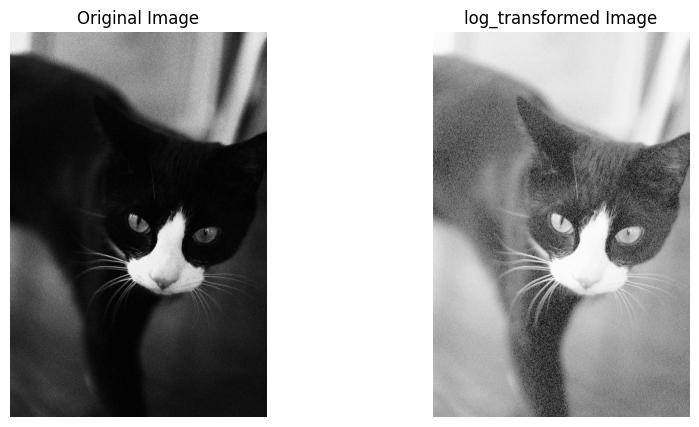

In [5]:
import cv2
import numpy as np

def log_transform(image):
    epsilon = 1e-5
    c = 255 / np.log(1 + np.max(image))
    log_image = c * np.log(image + 1 + epsilon)

    log_image = np.clip(log_image, 0, 255)
    return log_image.astype(np.uint8)

image = cv2.imread('./cat.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not open or find the image.")
else:
    log_transformed = log_transform(image)

    cv2.imwrite('log_transformed.jpg', log_transformed)
    print("Log-transformed image saved as 'log_transformed.jpg'.")
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('log_transformed Image')
    plt.imshow(cv2.cvtColor(log_transformed, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()



Low pass/ High pass spatial filtering

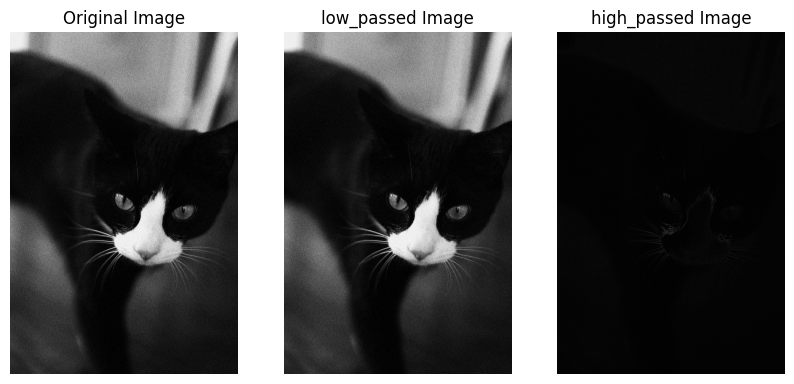

In [6]:
def low_pass_filter(image):
    kernel = np.ones((5, 5), np.float32) / 25
    return cv2.filter2D(image, -1, kernel)

def high_pass_filter(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

image = cv2.imread('./cat.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Could not open or find the image.")
else:
    low_passed = low_pass_filter(image)
    high_passed = high_pass_filter(image)

    cv2.imwrite('low_passed.jpg', low_passed)
    cv2.imwrite('high_passed.jpg', high_passed)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('low_passed Image')
    plt.imshow(cv2.cvtColor(low_passed, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('high_passed Image')
    plt.imshow(cv2.cvtColor(high_passed, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()


Gaussian Filters

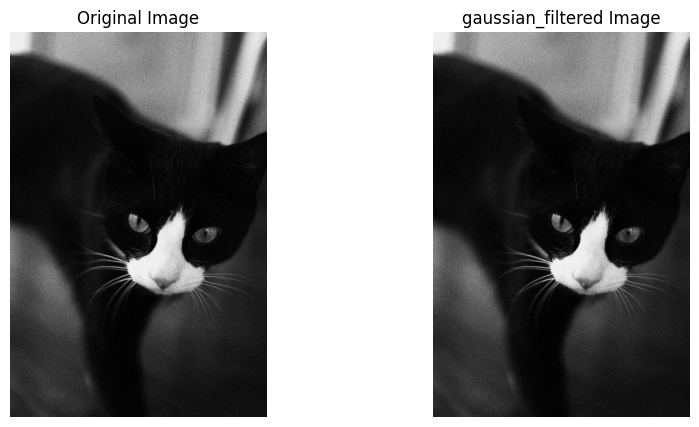

In [7]:
def gaussian_filter(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

image = cv2.imread('./cat.jpg')
if image is None:
    print("Error: Could not open or find the image.")
else:
    gaussian_filtered = gaussian_filter(image, kernel_size=5)

    cv2.imwrite('gaussian_filtered.jpg', gaussian_filtered)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('gaussian_filtered Image')
    plt.imshow(cv2.cvtColor(gaussian_filtered, cv2.COLOR_BGR2RGB))
    plt.axis('off')

Noise Filtering

Median-blurred image saved as 'median_blurred.jpg'.


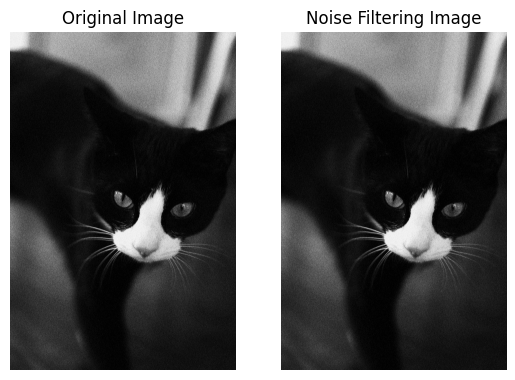

In [8]:
import cv2
import numpy as np

def median_blur(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

image = cv2.imread('./cat.jpg')

if image is None:
    print("Error: Could not open or find the image.")
else:
    median_blurred = median_blur(image, kernel_size=5)

    cv2.imwrite('median_blurred.jpg', median_blurred)
    print("Median-blurred image saved as 'median_blurred.jpg'.")
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Noise Filtering Image')
    plt.imshow(cv2.cvtColor(median_blurred, cv2.COLOR_BGR2RGB))
    plt.axis('off')